# Mobile Money Fraud Transaction Detection System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_csv('mobile_money_transactions.csv')
df.head()

,transaction_id,user_id,transaction_type,amount,device_id,location,timestamp,channel,agent_id,sim_swap_flag,balance_before,balance_after,transaction_velocity
0,T000000,U0568,cash_out,1866.53,D154,Owerri,2024-03-25 16:38:00,Agent,A175,0,93705.92,91839.39,1
1,T000001,U0497,cash_in,1365.35,D086,Ajah,2024-04-11 23:47:00,USSD,A298,0,90286.08,88920.73,0
2,T000002,U0269,receive,10722.95,D039,Portharcout,2024-04-01 14:52:00,Agent,A112,0,14613.59,3890.64,0
3,T000003,U0428,cash_in,1077.56,D026,Kano,2024-03-13 00:14:00,App,A171,1,4801.55,3723.99,0
4,T000004,U0035,receive,7068.91,D118,Ikeja,2024-06-28 23:38:00,USSD,A107,0,73981.31,66912.40,2


## Performing EDA

In [3]:
for col in df.columns:
    print(df[col].value_counts())

transaction_id
T049983    1
T049982    1
T049981    1
T049980    1
T049979    1
          ..
T000004    1
T000003    1
T000002    1
T000001    1
T000000    1
Name: count, Length: 50000, dtype: int64
user_id
U0517    76
U0762    73
U0725    72
U0742    72
U0945    71
         ..
U0663    32
U0843    31
U0483    31
U0793    30
U0454    27
Name: count, Length: 1000, dtype: int64
transaction_type
send        17555
receive     17417
cash_in      7606
cash_out     7422
Name: count, dtype: int64
amount
963.13     3
2292.71    3
911.25     3
1466.86    3
1205.23    3
          ..
8390.14    1
319.87     1
851.86     1
3081.94    1
116.31     1
Name: count, Length: 48780, dtype: int64
device_id
D182    287
D112    285
D038    282
D148    281
D085    280
       ... 
D087    217
D004    213
D105    213
D001    212
D180    208
Name: count, Length: 200, dtype: int64
location
Owerri         6359
Ikeja          6326
Portharcout    6314
Kano           6247
Ajah           6240
Yaba           6200
Makur

In [93]:
#checking for missing values
df.isnull().sum()

transaction_id          0
user_id                 0
transaction_type        0
amount                  0
device_id               0
location                0
timestamp               0
channel                 0
agent_id                0
sim_swap_flag           0
balance_before          0
balance_after           0
transaction_velocity    0
dtype: int64

In [94]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

In [95]:
#dropping the following columns: transaction_id	user_id
df.drop(columns=['transaction_id','user_id','agent_id','device_id'], inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_type      50000 non-null  object 
 1   amount                50000 non-null  float64
 2   location              50000 non-null  object 
 3   timestamp             50000 non-null  object 
 4   channel               50000 non-null  object 
 5   sim_swap_flag         50000 non-null  int64  
 6   balance_before        50000 non-null  float64
 7   balance_after         50000 non-null  float64
 8   transaction_velocity  50000 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.4+ MB


In [97]:
#changing the timestamp column to datetime datatype
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

In [98]:
df

,transaction_type,amount,location,timestamp,channel,sim_swap_flag,balance_before,balance_after,transaction_velocity
0,cash_out,1866.53,Owerri,2024-03-25 16:38:00,Agent,0,93705.92,91839.39,1
1,cash_in,1365.35,Ajah,2024-04-11 23:47:00,USSD,0,90286.08,88920.73,0
2,receive,10722.95,Portharcout,2024-04-01 14:52:00,Agent,0,14613.59,3890.64,0
3,cash_in,1077.56,Kano,2024-03-13 00:14:00,App,1,4801.55,3723.99,0
4,receive,7068.91,Ikeja,2024-06-28 23:38:00,USSD,0,73981.31,66912.40,2
...,...,...,...,...,...,...,...,...,...
49995,receive,8390.14,Aba,2024-02-18 07:15:00,App,0,54450.12,46059.98,1
49996,send,319.87,Makurdi,2024-02-29 20:30:00,App,0,12168.33,11848.46,1
49997,receive,851.86,Ikeja,2024-06-12 08:32:00,Agent,0,73184.15,72332.29,0
49998,cash_in,3081.94,Ikeja,2024-02-02 22:18:00,App,0,84692.66,81610.72,0


In [99]:
# Derive time-based features
df["hour_of_day"] = df["timestamp"].dt.hour
df["day_of_week"] = df["timestamp"].dt.dayofweek

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   transaction_type      50000 non-null  object        
 1   amount                50000 non-null  float64       
 2   location              50000 non-null  object        
 3   timestamp             50000 non-null  datetime64[ns]
 4   channel               50000 non-null  object        
 5   sim_swap_flag         50000 non-null  int64         
 6   balance_before        50000 non-null  float64       
 7   balance_after         50000 non-null  float64       
 8   transaction_velocity  50000 non-null  int64         
 9   hour_of_day           50000 non-null  int32         
 10  day_of_week           50000 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2), object(3)
memory usage: 3.8+ MB


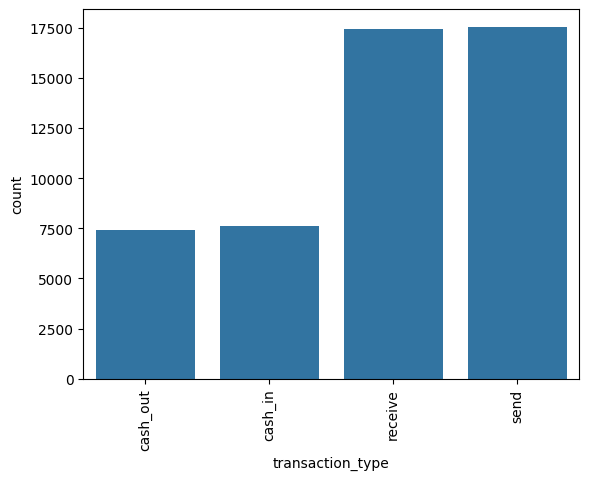

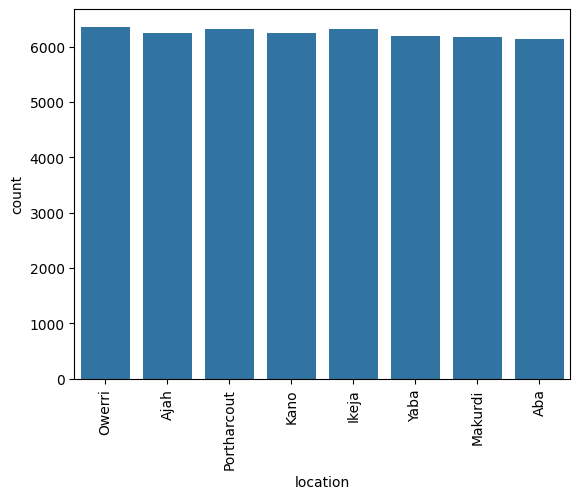

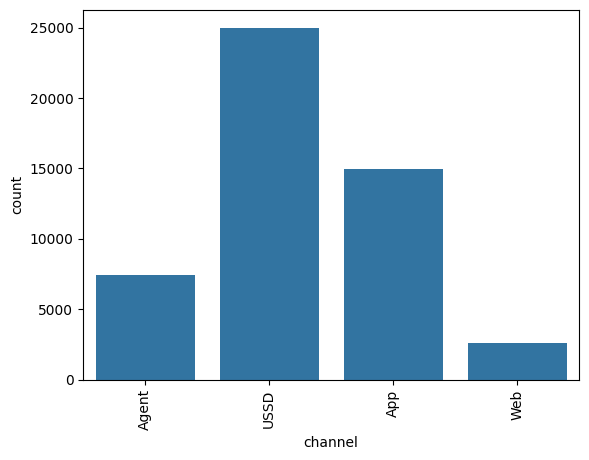

In [101]:
#visualizing the categorical variables
for col in df.select_dtypes(include=['object']).columns:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)
    plt.show()

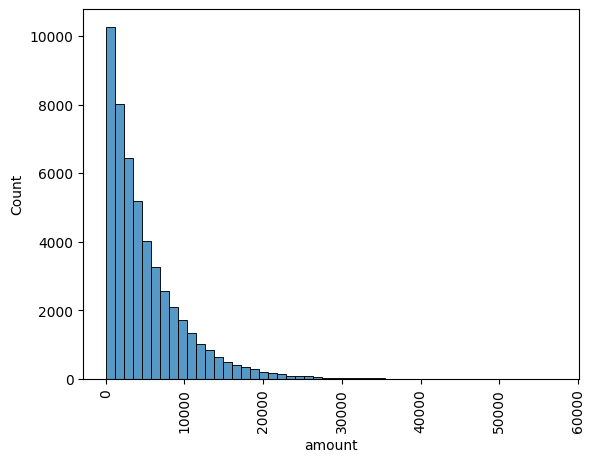

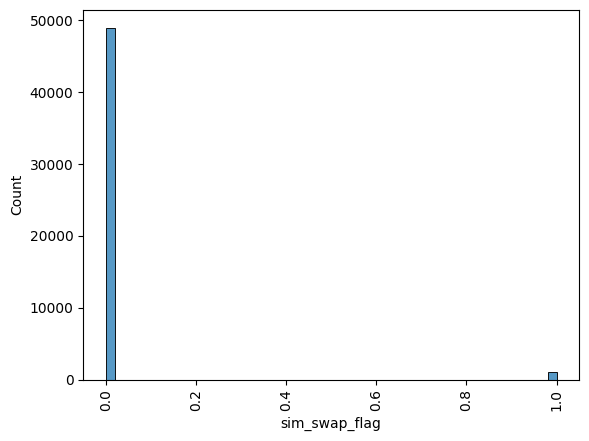

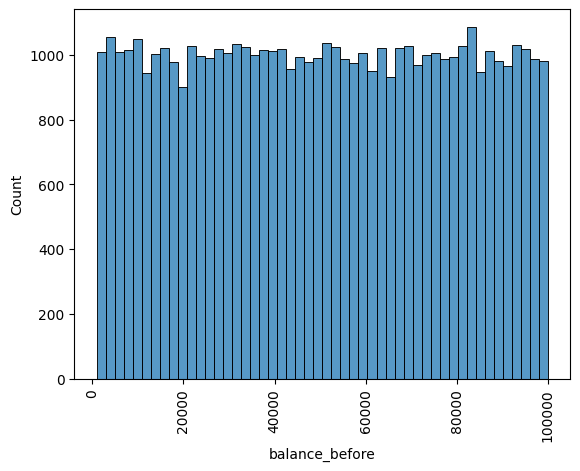

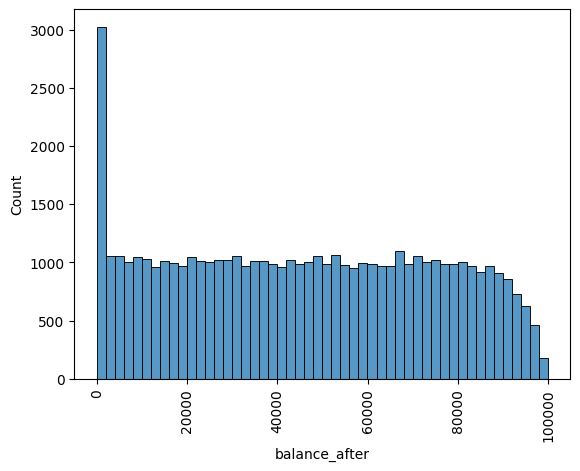

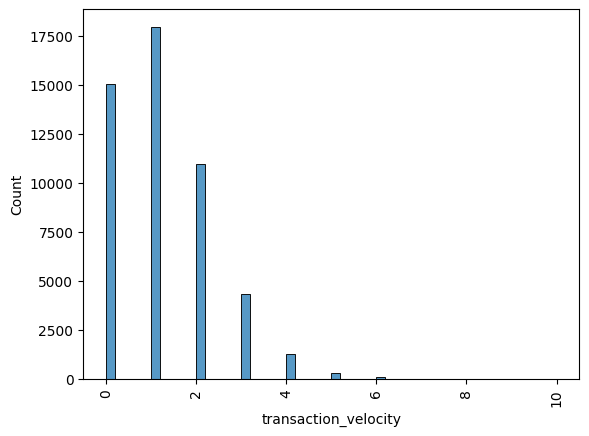

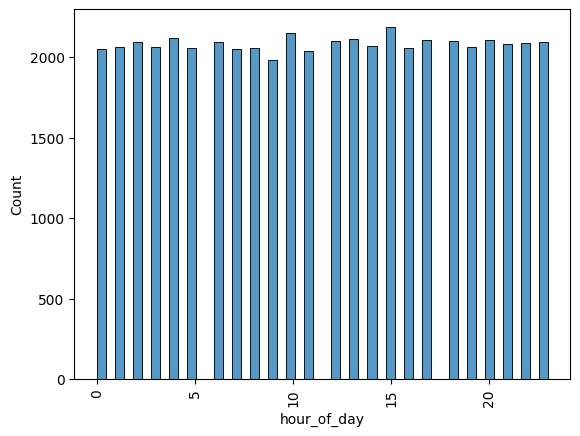

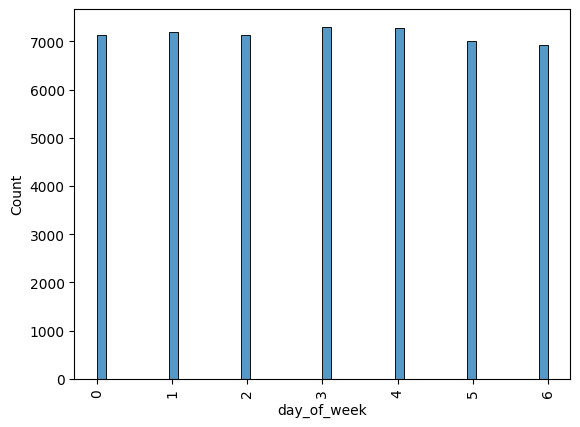

In [102]:
#visualizing the numerical variables
for col in df.select_dtypes(include=['float','int']).columns:
    sns.histplot(data=df[col], bins=50)
    plt.xticks(rotation=90)
    plt.show()

In [103]:
#Encoding the hour of day and the day of week feature to capture real life time and day instead of it numerical value
df['hour_sin'] = np.sin(2 * np.pi * df['hour_of_day'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour_of_day'] / 24)

df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)


In [104]:
df.head()

,transaction_type,amount,location,timestamp,channel,sim_swap_flag,balance_before,balance_after,transaction_velocity,hour_of_day,day_of_week,hour_sin,hour_cos,day_sin,day_cos
0,cash_out,1866.53,Owerri,2024-03-25 16:38:00,Agent,0,93705.92,91839.39,1,16,0,-0.866025,-0.500000,0.000000,1.000000
1,cash_in,1365.35,Ajah,2024-04-11 23:47:00,USSD,0,90286.08,88920.73,0,23,3,-0.258819,0.965926,0.433884,-0.900969
2,receive,10722.95,Portharcout,2024-04-01 14:52:00,Agent,0,14613.59,3890.64,0,14,0,-0.500000,-0.866025,0.000000,1.000000
3,cash_in,1077.56,Kano,2024-03-13 00:14:00,App,1,4801.55,3723.99,0,0,2,0.000000,1.000000,0.974928,-0.222521
4,receive,7068.91,Ikeja,2024-06-28 23:38:00,USSD,0,73981.31,66912.40,2,23,4,-0.258819,0.965926,-0.433884,-0.900969


### Preprocessing 

In [105]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()

#separating the features
#numerical features
num_col = df.select_dtypes(exclude=['object','datetime64[ns]']).columns
cat_col = df.select_dtypes(include=['object'])


In [106]:
num_col

Index(['amount', 'sim_swap_flag', 'balance_before', 'balance_after',
       'transaction_velocity', 'hour_of_day', 'day_of_week', 'hour_sin',
       'hour_cos', 'day_sin', 'day_cos'],
      dtype='object')

In [17]:
scaler.fit(df[num_col])

StandardScaler()

In [18]:
#transforming
df[num_col] = scaler.transform(df[num_col])

In [19]:
cat_col

,transaction_type,location,channel
0,cash_out,Owerri,Agent
1,cash_in,Ajah,USSD
2,receive,Portharcout,Agent
3,cash_in,Kano,App
4,receive,Ikeja,USSD
...,...,...,...
49995,receive,Aba,App
49996,send,Makurdi,App
49997,receive,Ikeja,Agent
49998,cash_in,Ikeja,App


In [20]:
# Encode categorical features (e.g., transaction_type, location)
label_encoders = {}

In [21]:
for col in cat_col:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
    label_encoders[col] = le

In [22]:
label_encoders

{'transaction_type': LabelEncoder(),
 'location': LabelEncoder(),
 'channel': LabelEncoder()}

In [23]:
df.head()

,transaction_type,amount,location,timestamp,channel,sim_swap_flag,balance_before,balance_after,transaction_velocity,hour_of_day,day_of_week,hour_sin,hour_cos,day_sin,day_cos
0,1,-0.630018,5,2024-03-25 16:38:00,0,-0.142857,1.512870,1.614019,-0.184980,0.645754,-1.499892,-1.219541,-0.705471,-0.009887,1.419813
1,0,-0.729966,1,2024-04-11 23:47:00,2,-0.142857,1.393336,1.512107,-1.095134,1.657558,0.008689,-0.360691,1.367378,0.605837,-1.259642
2,2,1.136169,6,2024-04-01 14:52:00,0,-0.142857,-1.251638,-1.456922,-1.095134,0.356667,-1.499892,-0.701824,-1.223038,-0.009887,1.419813
3,0,-0.787358,3,2024-03-13 00:14:00,1,7.000000,-1.594597,-1.462741,-1.095134,-1.666942,-0.494171,0.005390,1.415560,1.373633,-0.303356
4,2,0.407464,2,2024-06-28 23:38:00,2,-0.142857,0.823437,0.743633,0.725175,1.657558,0.511550,-0.360691,1.367378,-0.625611,-1.259642


### Training the Unspervised Model

In [24]:
from sklearn.ensemble import IsolationForest

#selecting features for anomaly detection
#balance_after, amount, balance_before, hour_sin, hour_cos, day_cos, day_sin, transaction_velocity
features = ['amount', 'balance_before', 'balance_after', 
            'hour_sin','hour_cos','day_sin','day_cos', 'transaction_velocity']

X = df[features]

In [ ]:
# Train the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
model.fit(X)

# Predict anomalies (-1 for fraud, 1 for normal)
df['anomaly_score'] = model.decision_function(X)
df['is_anomaly'] = model.predict(X)

# Convert -1 (anomaly) to True, 1 (normal) to False
df['is_fraud'] = df['is_anomaly'].map({-1: True, 1: False})

In [26]:
df[df['is_fraud']==True]

,transaction_type,amount,location,timestamp,channel,sim_swap_flag,balance_before,balance_after,transaction_velocity,hour_of_day,day_of_week,hour_sin,hour_cos,day_sin,day_cos,anomaly_score,is_anomaly,is_fraud
50,2,4.946327,3,2024-04-25 20:45:00,2,-0.142857,1.146343,0.271497,0.725175,1.223928,0.008689,-1.219541,0.708550,0.605837,-1.259642,-0.006760,-1,True
109,2,2.908809,6,2024-06-05 18:15:00,2,-0.142857,-1.502382,-1.560834,2.545484,0.934841,-0.494171,-1.409039,0.001540,1.373633,-0.303356,-0.035674,-1,True
116,2,1.248479,4,2024-06-02 09:24:00,0,-0.142857,1.554655,1.326854,3.455638,-0.366051,1.517271,1.005543,-0.998324,-1.119383,0.889114,-0.011679,-1,True
120,2,0.616291,5,2024-02-27 11:58:00,0,-0.142857,-1.586672,-1.560760,4.365793,-0.076964,-0.997032,0.371471,-1.364299,1.099610,0.889114,-0.012213,-1,True
176,1,4.958588,3,2024-06-08 02:10:00,0,-0.142857,-0.888592,-1.562153,-1.095134,-1.377855,1.014410,0.712605,1.226117,-1.393406,-0.303356,-0.012253,-1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49534,3,-0.723148,4,2024-02-14 03:25:00,0,-0.142857,1.436516,1.554048,3.455638,-1.233311,-0.494171,1.005543,1.001403,1.373633,-0.303356,-0.000034,-1,True
49624,3,-0.733512,3,2024-03-26 18:38:00,1,-0.142857,1.716845,1.835907,2.545484,0.934841,-0.997032,-1.409039,0.001540,1.099610,0.889114,-0.011451,-1,True
49630,3,1.082877,3,2024-06-01 01:22:00,1,-0.142857,1.662651,1.463736,2.545484,-1.522398,1.014410,0.371471,1.367378,-1.393406,-0.303356,-0.012178,-1,True
49943,1,2.407097,1,2024-03-21 12:04:00,0,-0.142857,-1.513748,-1.586074,1.635329,0.067580,0.008689,0.005390,-1.412481,0.605837,-1.259642,-0.011092,-1,True


### Training the Supervised Model

In [27]:
X_df = X.copy()
X_df['is_anomaly'] = model.predict(X)

# Convert -1 (anomaly) to True, 1 (normal) to False
X_df['is_fraud'] = df['is_anomaly'].map({-1: 1, 1: 0})

In [28]:
X_df[X_df['is_fraud']==True]

,amount,balance_before,balance_after,hour_sin,hour_cos,day_sin,day_cos,transaction_velocity,is_anomaly,is_fraud
50,4.946327,1.146343,0.271497,-1.219541,0.708550,0.605837,-1.259642,0.725175,-1,1
109,2.908809,-1.502382,-1.560834,-1.409039,0.001540,1.373633,-0.303356,2.545484,-1,1
116,1.248479,1.554655,1.326854,1.005543,-0.998324,-1.119383,0.889114,3.455638,-1,1
120,0.616291,-1.586672,-1.560760,0.371471,-1.364299,1.099610,0.889114,4.365793,-1,1
176,4.958588,-0.888592,-1.562153,0.712605,1.226117,-1.393406,-0.303356,-1.095134,-1,1
...,...,...,...,...,...,...,...,...,...,...
49534,-0.723148,1.436516,1.554048,1.005543,1.001403,1.373633,-0.303356,3.455638,-1,1
49624,-0.733512,1.716845,1.835907,-1.409039,0.001540,1.099610,0.889114,2.545484,-1,1
49630,1.082877,1.662651,1.463736,0.371471,1.367378,-1.393406,-0.303356,2.545484,-1,1
49943,2.407097,-1.513748,-1.586074,0.005390,-1.412481,0.605837,-1.259642,1.635329,-1,1


In [29]:
# dropping the is_anomaly score value
del X_df['is_anomaly']

<Axes: xlabel='is_fraud', ylabel='count'>

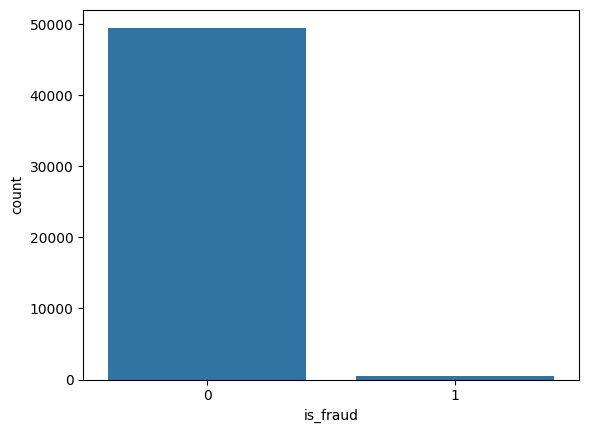

In [30]:
#visualizing the distribution of anomaly
sns.countplot(X_df, x='is_fraud')

The dataset is really inbalance, so lets treat using smote

#### Treating imbalance issue using smote

In [31]:
#separating the dataset in to X and Y
X = X_df.drop(columns='is_fraud')
y = X_df['is_fraud']

In [32]:
#splitting dataset into train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [33]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_smote))

After SMOTE: Counter({0: 34650, 1: 34650})


In [34]:
#fitting the dataset across various classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#evaluation metrics
from sklearn.metrics import classification_report, precision_score, roc_auc_score, confusion_matrix

In [35]:
#SVC
svc = SVC()
svc.fit(X_smote, y_smote)
y_pred_svc = svc.predict(X_test)

#evaluating
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[14707   143]
 [    2   148]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14850
           1       0.51      0.99      0.67       150

    accuracy                           0.99     15000
   macro avg       0.75      0.99      0.83     15000
weighted avg       0.99      0.99      0.99     15000



In [36]:
#RandomForest
rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)
y_pred_rf = rf.predict(X_test)

#evaluating
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[14812    38]
 [   22   128]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14850
           1       0.77      0.85      0.81       150

    accuracy                           1.00     15000
   macro avg       0.88      0.93      0.90     15000
weighted avg       1.00      1.00      1.00     15000



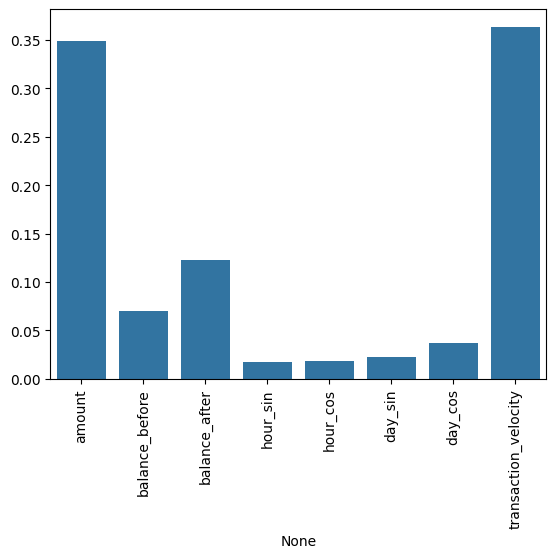

In [37]:
#feature importance
sns.barplot(x=X.columns, y=rf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_rf)


np.float64(0.9253872053872055)

In [50]:
f1_score(y_test, y_pred_rf)

0.810126582278481

In [39]:
rf.predict([[-0.630018,1.512870,1.614019,	-1.219541,	-0.705471,	-0.009887,	1.419813,	-0.184980,]])

c:\Users\DELL\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [40]:
rf.predict([[4.946327,1.146343,0.271497,-1.219541,0.708550,0.605837,-1.259642,0.725175]])

c:\Users\DELL\anaconda3\envs\fraud_detection\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
#fine-tuning the randomforest model using optuna
#!pip install optuna
import optuna
from sklearn.metrics import f1_score

# Split your data (assuming binary classification)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int("n_estimators", 100, 500)
    max_depth = trial.suggest_int("max_depth", 4, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2"])

    # Model definition
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)

    # Use F1-score for imbalanced classification like fraud detection
    return f1_score(y_val, y_pred, average="binary")



In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # You can increase n_trials for better results


In [ ]:
print("Best trial:")
trial = study.best_trial

print(f"  F1 Score: {trial.value}")
print("  Best Hyperparameters:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


In [ ]:
best_rf = RandomForestClassifier(
    **trial.params,
    random_state=42,
    n_jobs=-1
)
best_rf.fit(X_train, y_train)


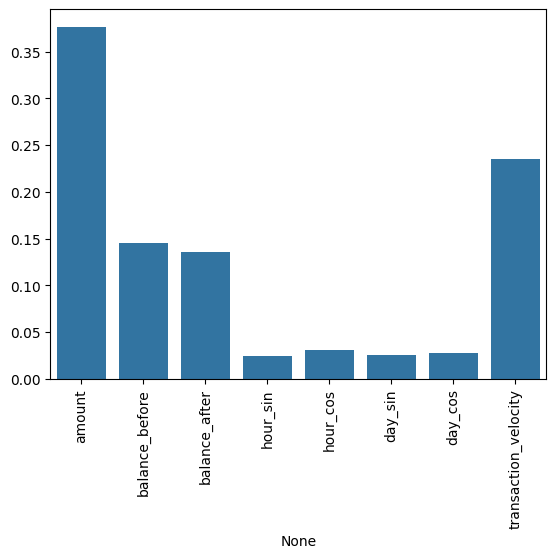

In [49]:
#feature importance
sns.barplot(x=X.columns, y=best_rf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [52]:
#cross-validatin Rf
# Cross-validation
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='f1', n_jobs=-1)

In [56]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_best = cross_val_score(best_rf, X, y, cv=5, scoring='f1', n_jobs=-1)

In [57]:
print(scores.mean())

0.7001816826384604


In [58]:
print(scores_best.mean())

0.7345195990461129


After fine-tuning as well as cross-validated, the random forest classifier performance increased

1.) Building the Fruad Detective GUI: 
- this will collect the transaction details then send to the Fraud Detector GUI.

2.) Building the Fruad Detector GUI - 
- this will receive the transaction details from the Fraud Detective Gui, send an Email if the transaction is Fraud, then Display on the dashboard the time, and number of fraud in today detected by the detective 


In [ ]:
#create a function for the preprocessing
#dump the scaler 
#dump the label encoder --------- not be use since we didnt use any categorical feature
#fine-tune the randomforest model ---- done
#cross-validate the model ---- done
#dump the isolation forest model
#dump the randomforest model

In [61]:
#dumping the scaler
import joblib

with open('Fraud_detection_scaler.pkl', 'wb') as f:
    joblib.dump(scaler, f)

In [62]:
#dumping the isolation forest

with open('Fraud_detection_iso_forest.pkl', 'wb') as iso:
    joblib.dump(model, iso)

In [63]:
# dumping the random forest classifier

with open('Fraud_detection_best_rf.pkl', 'wb') as cls:
    joblib.dump(best_rf, cls)

In [175]:
# creating the function for preprocessing
#steps involved in preprocessing
# 1. convert timestamp to datetime datatype
# 2. slice out the hour and day of week from the timestamp, feature engineer the sliced day and time.
# 3. scale the selected features
# 4. use the isolation model to predict
# 5. add the isolation prediction to the entered record
# 6. use the random forest model to predict if its actually an anomaly or not

#loading the required dumped files


with open('Fraud_detection_scaler.pkl', 'rb') as std_scaler:
    std_scaler = joblib.load(std_scaler)


with open('Fraud_detection_iso_forest.pkl', 'rb') as iso_forest:
    iso_cls = joblib.load(iso_forest)

with open('Fraud_detection_best_rf.pkl', 'rb') as rf_model:
    rf_cls = joblib.load(rf_model)



def preprocess_and_predict(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

    #Encoding the hour of day and the day of week feature to capture real life time and day instead of it numerical value
    # Derive time-based features
    df["hour_of_day"] = df["timestamp"].dt.hour
    df["day_of_week"] = df["timestamp"].dt.dayofweek

    df['hour_sin'] = np.sin(2 * np.pi * df['hour_of_day'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour_of_day'] / 24)

    df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

    df['sim_swap_flag'] = df['sim_swap_flag'].map({'Yes':1, 'No':0})

    selected_columns = ['amount', 'sim_swap_flag', 'balance_before', 'balance_after','transaction_velocity', 'hour_of_day', 'day_of_week', 'hour_sin','hour_cos', 'day_sin', 'day_cos']
    df_1 = df.copy()
    df_1 = df[selected_columns]
    
    #scaling
    df_2 = df_1.copy()
    df_2[selected_columns] = std_scaler.transform(df_1)
    predictors = ['amount','balance_before','balance_after','hour_sin','hour_cos','day_sin','day_cos','transaction_velocity']
    df_3 = df_2.copy()
    df_3 = df[predictors]
    
    #predicting with isolation forest
    is_anomaly = iso_cls.predict(df_3)
    #trigerring ther random forest classifier if isolation forest does its prediction
    if is_anomaly == -1:
        is_anomaly = 1  # this is to say that the transaction is an anomaly

    #    #predicting with random forest
        rf_predict = rf_cls.predict(df_3)

    #if rf_predict != is_anomaly: # if the prediction of the iso_forest is not equal to the random forest choose the random forest prediction.
        prediction = rf_predict[0]
        preprocess_and_predict.prediction = prediction
        print(preprocess_and_predict.prediction)
        if preprocess_and_predict.prediction == 1:
            result = f'''Alert Fraudulent Transaction just occured
                         Time: {df['timestamp']}
                         Amount: {df['amount']}'''
        else:
            result = f'Genuine Transaction'

    return result

In [183]:
test_df = pd.DataFrame({
    'amount':[20000],
    'sim_swap_flag': ['Yes'],
    'balance_before':[25000],
    'balance_after':[5000],
    'transaction_velocity':[1], 
    'timestamp': ['2024-03-25 16:38:00']
})

In [184]:
test_df['is_fraud'] = preprocess_and_predict.prediction

In [191]:
test_df

,amount,sim_swap_flag,balance_before,balance_after,transaction_velocity,timestamp,is_fraud
0,20000,Yes,25000,5000,1,2024-03-25 16:38:00,1


In [192]:
input_list = list(test_df.values[0])
line = ', '.join(map(str, input_list)) + '\n'

In [193]:
line

'20000, Yes, 25000, 5000, 1, 2024-03-25 16:38:00, 1\n'

In [196]:
preprocess_and_predict(test_df)

1


'Alert Fraudulent Transaction just occured\n                         Time: 0   2024-03-25 16:38:00\nName: timestamp, dtype: datetime64[ns]\n                         Amount: 0    20000\nName: amount, dtype: int64'

In [180]:
preprocess_and_predict.prediction

np.int64(1)

In [ ]:
#dumping the model
